In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from IPython.display import display, clear_output
import time

class Gridworld:
    def __init__(self, size_x, size_y):
        self.size_x = size_x
        self.size_y = size_y
        self.grid = np.zeros((size_x, size_y))
        self.obstacle_percentage = 0.005
        self.obstacles = []
    def place_obstacles(self):
        #Draw two line obstacles
        self.obstacles = [[[100,500],[400,500]], [[600,620],[600,820]]]
        self.grid[500:501,100:400] = 1 # Covers 300 cells 
        self.grid[620:820, 600:601] = 1 # Covers 200 cells
    def place_obstacles_random(self):
        rand_grid = np.random.rand(self.size_x,self.size_y)
        self.grid[rand_grid<self.obstacle_percentage] = 1
    def get_random_free_position(self):
        free = False
        while(not free):
            rnd_pos = np.array([np.random.rand()*self.size_x, np.random.rand()*self.size_y])
            if self.grid[int(rnd_pos[0]), int(rnd_pos[1])] == 0:
                free = True
        return rnd_pos

class Node:
    def __init__(self, pos, parent=None):
        self.pos = pos
        self.parent = parent

def counter_clockwise(x1,x2,x3):
    return (x3[1]-x1[1]) * (x2[0]-x1[0]) > (x2[1]-x1[1]) * (x3[0]-x1[0])

def line_segment_intersect(x1_start,x1_end,x2_start,x2_end):
    return counter_clockwise(x1_start,x2_start,x2_end) != counter_clockwise(x1_end,x2_start,x2_end) and counter_clockwise(x1_start,x1_end,x2_start) != counter_clockwise(x1_start,x1_end,x2_end)

def obstacle_free(x_nearest, x_new, gridworld):
    for i in range(len(gridworld.obstacles)):
        if line_segment_intersect(gridworld.obstacles[i][0], gridworld.obstacles[i][1], x_nearest, x_new):
            return False
    return True

def find_nearest_node(node_tree, node):
    dist, i = node_tree.query(node.pos, k=1, p=2)
    return dist, i


KeyboardInterrupt: 

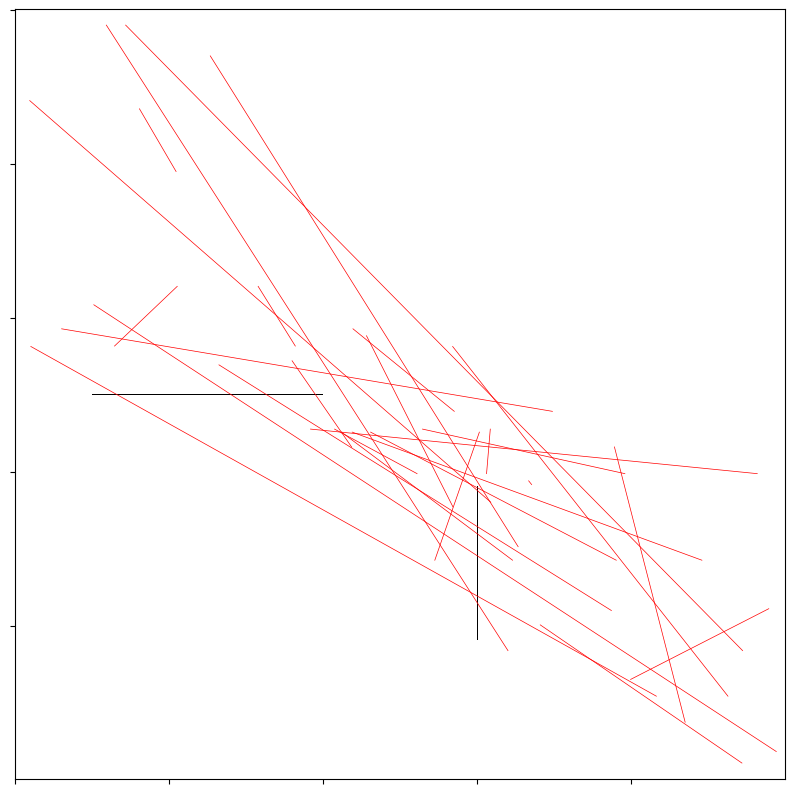

In [44]:
np.random.seed(0)
num_iterations = 100
num_experiments = 1

x_f = np.array([200,200])
gridworld = Gridworld(1000,1000)
gridworld.place_obstacles()

plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.imshow(gridworld.grid, cmap='Greys')
ax.set_xticklabels([])
ax.set_yticklabels([])
    
for i in range(num_experiments): 
    x0 = gridworld.get_random_free_position()
    n0 = Node(x0)
    
    node_list = np.array([n0])

    prev_node = n0
    for i in range(num_iterations):
        display(fig)
        node_tree = KDTree(np.array([n.pos for n in node_list]))
        rand_node = Node(gridworld.get_random_free_position())
        _, i = find_nearest_node(node_tree, rand_node)
        if obstacle_free(node_tree.data[i], rand_node.pos, gridworld):
            rand_node.parent = node_list[i]
            node_list = np.append(node_list, rand_node)
            plt.plot(rand_node.pos, node_list[i].pos, 'r-', linewidth=0.5)
        clear_output(wait = True)
        time.sleep(0.5)
